# Лабораторная работа 3. Модель однофазной одноканальной открытой системы обслуживания

## Задание 1.

В процессе эксплуатации ЭВМ осуществляются ее разовые проверки, в результате которых она может оказаться в следующих состояниях:
- $S_1$ - ЭВМ полностью исправна;
- $S_2$ - ЭВМ имеет незначителльные неисправности в программном обеспечении, при которых она может решать задачи;
- $S_3$ - ЭВМ имеет существенные неисправности и может решать ограниченный класс задач;
- $S_4$ - ЭВМ полностью вышла из строя.

В начальный момент времени ЭВМ полностью исправна (состояние $S_1$). Проверка ЭВМ производится в фиксированные моменты времени $t_k$. Процесс, протекающий в системе, может рассматриваться как однородная марковская цепь с $k$ шагами ($1, 2,\ldots, k$ проверки). Матрица переходных вероятностей имеет вид:
\begin{equation}
P = \begin{pmatrix} p_{11} & p_{12} & p_{13} & p_{14} \\ 0 & p_{22} & p_{23} & p_{24} \\0 & 0 & p_{33} & p_{34}\\ 0 & 0 & 0 & p_{44}\end{pmatrix} 
\end{equation}

Построить граф состояний. Найти вероятности (численно и теоретически) состояний ЭВМ после $k-2, k-1, k$ осмотров.

In [ ]:
Variant<-8
set.seed(Variant) 
k<-sample(c(4:9),1)
pp1<-runif(4)
pp2<-runif(3)
pp3<-runif(2)
p1<-pp1/sum(pp1)
p2<-c(c(0),pp2/sum(pp2))
p3<-c(c(0,0),pp3/sum(pp3))
p4<-c(0,0,0,1)
P<-data.frame()
P<-rbind(P,p1)
P<-rbind(P,p2)
P<-rbind(P,p3)
P<-rbind(P,p4)
rownames(P)<-c("p1","p2","p3","p4")
colnames(P)<-c("","","","")
View(P)
print(paste("k=",as.character(k)))

,,,,
,<dbl>,<dbl>,<dbl>,<dbl>
p1,0.3208944,0.2615892,0.1290183,0.2884981
p2,0.0000000,0.1459995,0.4679388,0.3860617
p3,0.0000000,0.0000000,0.5850840,0.4149160
p4,0.0000000,0.0000000,0.0000000,1.0000000


[1] "k= 7"


Граф состояний:

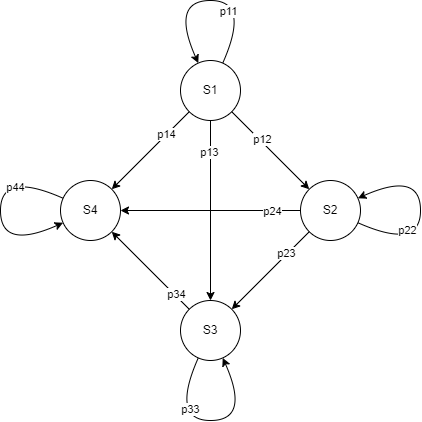

Найти вероятности (теоретически) состояний ЭВМ после $k-2, k-1, k$ осмотров:

In [ ]:
#install.packages("matrixcalc")
library(matrixcalc)
P_matr <- data.matrix(P, rownames.force = NA) # view -> matrix

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
p0 <- c(1, 0, 0, 0) # Начальное состояние

pkm2  <- p0 %*% matrix.power(P_matr, k-2)
pkm1  <- p0 %*% matrix.power(P_matr, k-1)
pk    <- p0 %*% matrix.power(P_matr, k)

pkm2
pkm1
pk

,,,
0.003402599,0.004990025,0.09526266,0.8963447


,,,
0.001091875,0.001618624,0.05851069,0.9387788


,,,
0.0003503766,0.0005219411,0.03513196,0.9639957


Найти вероятности (численно) состояний ЭВМ после $k-2, k-1, k$ осмотров

In [ ]:
N <- 1000 # число повторов
p_exp <- c(0, 0, 0, 0) # Количество раз, которое ЭВМ оказалась в каждом из состояний

getProbsForK<-function(kk) {
for (i in 1:N) {
  curState <- 1
  for (j in 1:kk) {
    val <- runif(1)
    if (curState == 1) {
      if (val < P_matr[1, 1]) {
        curState <- 1
      } else if (val < P_matr[1, 1] + P_matr[1, 2]) {
        curState <- 2
      } else if (val < P_matr[1, 1] + P_matr[1, 2] + P_matr[1,3]) {
        curState <- 3
      } else {
        curState <- 4
      }
    } else if (curState == 2) {
      if (val < P_matr[2, 2]) {
        curState <- 2
      } else if (val < P_matr[2, 2] + P_matr[2, 3]) {
        curState <- 3
      } else {
        curState <- 4
      }
    } else if (curState == 3) {
      if (val < P_matr[3, 3]) {
        curState <- 3
      } else {
        curState <- 4
      }
    } else {
      curState <- 4
    }
  }
  p_exp[curState] = p_exp[curState] + 1
}

probs <- c(
  p_exp[1]/N, 
  p_exp[2]/N, 
  p_exp[3]/N, 
  p_exp[4]/N
)

return(probs)
}

getProbsForK(k-2)
getProbsForK(k-1)
getProbsForK(k)



[1] 0.003 0.002 0.092 0.903

[1] 0.000 0.002 0.060 0.938

[1] 0.00 0.00 0.03 0.97

## Задание 2.

Вычислительный центр фирмы состоит из одного главного сервера коллективного пользования. Число работающих в центре программистов в любой момент времени равно $k$. Каждый программист готовит свою программу и через терминал передает ее на сервер для выполнения, куда она сразу попадает. Время подготовки программ имеет экспоненциальное распределение со средним значением $t_{1}$ мин. Время выполнения программы имеет экспоненциальное распределение со средним значением $t_{2}$ мин. Найти (теоретически и экспериментально):
 - вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал;
 - среднее время до получения пользователем результатов реализации;
 - среднее количество программ, ожидающих выполнения на сервере.

In [71]:
Variant<-8
set.seed(Variant) 
k<-sample(c(10:25),1)
t1<-sample(c(14:20),1)
t2<-sample(c(2:5),1)
View(data.frame(k,t1,t2))

k,t1,t2
<int>,<int>,<int>
25,17,4


Теоретическая часть:

Вычислительный центр представляет из себя СМО вида $M/M/1/\infty$, для которой процесс гибели-размножения представим в следующем виде:

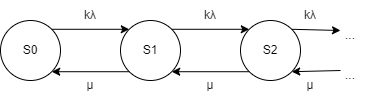

Число состояний этой системы неограничено, поскольку пользователи не ждут ответа от сервера, значит, система — открытая.

Интенсивность подготовки программ k программистами:
$$\lambda_i = \lambda = \frac{k}{t_1}$$
Интенсивность выполнения программ сервером:
$$\mu_i = \mu = \frac{1}{t_2}$$
Коэффициент загрузки системы:
$$\rho_i = \rho = \frac{\lambda}{\mu}$$

Определим искомые характеристики системы:
- Вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал:
$$ \overline{P_0} = 1 - P_0 $$
$$P_0=1-\rho$$
$$ \overline{P_0} = \rho $$

- Среднее время до получения пользователем результатов реализации:
$$T_{\text{сист}}=\frac{1}{\mu(1-\rho)}$$

- Среднее количество программ, ожидающих выполнения на сервере:
$$L_{оч} = \lambda \cdot W_{\text{оч}} = \frac{\rho^2}{(1-\rho)} $$



Теоретическая часть в среде R:

In [72]:
l <- k/t1
m <- 1/t2
l
m

[1] 1.470588

[1] 0.25

$\mu < \lambda$, условие успешной обработки программ не выполняется, изменим исходные данные:

Пусть
$$k = 5$$
$$t1 = 25$$
$$t2 = 3$$

In [131]:
k <- 5
t1 <- 25
t2 <- 3
l <- k/t1
m <- 1/t2
ro <- l/m
Tsist <- 1/(m*(1-ro))
Loch <- ro^2 / (1 - ro)
l
m
print("not P0 = "); ro # = !P0
print("Tsist = "); Tsist
print("Loch = "); Loch

[1] 0.2

[1] 0.3333333

[1] "not P0 = "


[1] 0.6

[1] "Tsist = "


[1] 7.5

[1] "Loch = "


[1] 0.9

Практическая часть в среде R:

In [134]:
l <- 1/t1
m <- 1/t2

N <- 1000000    # Число тиков (прибавления дельт времени)
dt <- 0.01      # Тик (Дельта времени)
# N * dt        # Время симуляции программы (в единицах времени симуляции)
curTime <- 0    # Текущее время симуляции

queueDuration <- 0 # Временной буфер - через сколько времени обработаются все заявки в системе
queueDurationTotal <- 0

P0 <- 0     # вероятность того, что программа будет выполнена сразу же, как только она поступила на терминал 
NotP0 <- 0  # вероятность того, что программа не будет выполнена сразу же, как только она поступила на терминал

q <- c()    # очередь длительностей обработки программ в системе
qLenTotal <- 0

numOfReqs <- 0
handleDurationTotal <- 0

progSendTimes <- rexp(k, l) # времена, в которые программисты отправляют свои программы

for (i in 1:N) {
  curTime <- curTime + dt
  for (j in 1:k) {
    if (curTime >= progSendTimes[j]) {
      numOfReqs <- numOfReqs + 1
      if (queueDuration == 0) {
        P0 <- P0 + 1
      } else {
        NotP0 <- NotP0 + 1
      }
      handleDuration <- rexp(1, m)      # Время обработки задачи на сервере
      handleDurTotal <- handleDurationTotal + handleDuration
      q <- append(q, handleDuration)    # Добавляем это время в очередь обработки
      queueDurationTotal <- queueDurationTotal + queueDuration
      queueDuration <- queueDuration + handleDuration   # Заявка встает в конец очереди
      progSendTimes[j] <- progSendTimes[j] + rexp(1, l) # Следующее время отправки заявки j-м пользователем
    }
  }

  # сокращение времени обработки текущей программы, которая находится на сервере.
  if (length(q) >= 1) {
    q[1] <- q[1] - dt
    if (q[1] <= 0) {
      q <- q[-1]
    }
  }
  if (length(q) >= 1) {
      qLenTotal <- qLenTotal + length(q) - 1 # Не учитываем программу, которая обрабатывается на сервере
  }

  # сокращение временного буфера.
  if (queueDuration >= dt) {
    queueDuration <- queueDuration - dt
  } else {
    queueDuration <- 0
  }
}

# Вероятность того, что программа будет выполнена не сразу
NotP0 / (P0 + NotP0) 

(totalBuffer + handleDurTotal) / numOfReqs

# Среднее количество программ, ожидающих выполнения на сервере
qLenTotal / N

[1] 0.5765538

[1] 7.708265

[1] 0.796987

## Дополнительное задание. 

<p style='text-align: justify;'>
Точка блуждает по оси абсцисс: на каждом шаге она с вероятностью $p_1$ остается на месте, с вероятностью $p_2$ перескакивает на единицу вправо и с вероятностью $p_3$ влево. Состояние системы  после $k$ шагов определяется одной координатой (абсциссой) точки. Рассматривая последовательность положений точки как цепь Маркова, найти вероятность (численно и теоретически) того, что она после $k$ шагов окажется от начала координат не дальше, чем на расстоянии, равном $m$.
</p>

In [ ]:
Variant<-8
set.seed(Variant) 
pp<-runif(3)
p1<-pp[1]/sum(pp)
p2<-pp[2]/sum(pp)
p3<-pp[3]/sum(pp)
k<-sample(c(4:8),1)
m<-sample(c(1:k),1)
View(data.frame(p1,p2,p3,k,m))